In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


Checking any null values

In [3]:
nan_values = df.isna()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


The above result shows that Cuisines contains NULL values.

Using other dataset which contains country codes so that analysis couldbe done properly countrywise

In [4]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df1 = pd.read_excel('Country-Code.xlsx')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


Merging both the datasets for more efficient analysis.

In [6]:
df2 = pd.merge(df, df1, on='Country Code', how = 'left')     # here 'on' specifies the column on which we want to merge the dataframes

In [7]:
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


Exploratory Analysis and Visualization

Let's see the geographical spread of zomato

In [8]:
print('List of countries the survey is spread across: ')
for i in df2['Country'].unique():
    print(i)
print ('Total number of countries the survey is spread across: ', len(df2['Country'].unique()))

List of countries the survey is spread across: 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey
Total number of countries the survey is spread across:  15


Let's plot a graph for this

In [9]:
%pip install plotly


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from plotly.offline import iplot 
labels = list(df2['Country'].value_counts().index)
values = list(df2['Country'].value_counts().values)

fig = {"data": [
    {
        "labels": labels,
        "values": values,
        "hoverinfo": "label+percent",
        "domain": {"x": [0, .9]},
        "hole": .6,
        "type": "pie",
        "rotation": 120,
    }],
       "layout": {
           "title":"Spread of Zomato across the world",
           "annotations": [
               {
                   "font": {"size": 20},
                   "showarrow": False,
                   "text": "Countries",
                   "x": 0.50,
                   "y": 0.5
               }
           ]
       }
      }


In [11]:
labels

['India',
 'United States',
 'United Kingdom',
 'Brazil',
 'UAE',
 'South Africa',
 'New Zealand',
 'Turkey',
 'Australia',
 'Phillipines',
 'Indonesia',
 'Singapore',
 'Qatar',
 'Sri Lanka',
 'Canada']

In [12]:
%pip install nbformat


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
iplot(fig)

Go for spatio-temporal analysis including time and space 

Plotly: Ideal for more complex, interactive visualizations where we can add additional layers or customize the appearance extensively.

visualizing the distribution across different countries, cities, or neighborhoods

In [14]:
import plotly.express as px
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', color='Aggregate rating', hover_name='Restaurant Name', hover_data=['City', 'Aggregate rating'], 
                        zoom=10, center=dict(lat=map_center[0], lon=map_center[1]), height=600)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [15]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Stnderdizing the data before applying k-means clustering

In [17]:
locations = df[['Latitude', 'Longitude']].dropna()
scaler = StandardScaler()
scaled_locations = scaler.fit_transform(locations)

Applying k-means clustering

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



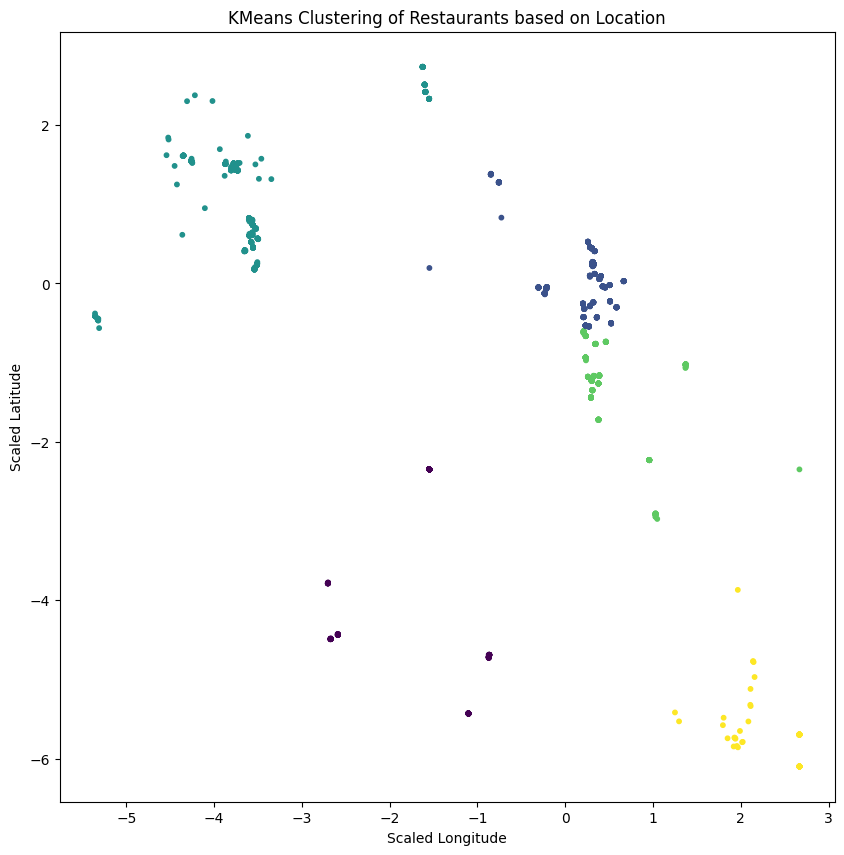

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_locations)
plt.figure(figsize=(10, 10))
plt.scatter(scaled_locations[:, 1], scaled_locations[:, 0], c=kmeans.labels_, cmap='viridis', s=10)
plt.xlabel('Scaled Longitude')
plt.ylabel('Scaled Latitude')
plt.title('KMeans Clustering of Restaurants based on Location')
plt.show()

 Heatmaps: to visualize densities of restaurants, high rating areas, or regions with more reviews

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

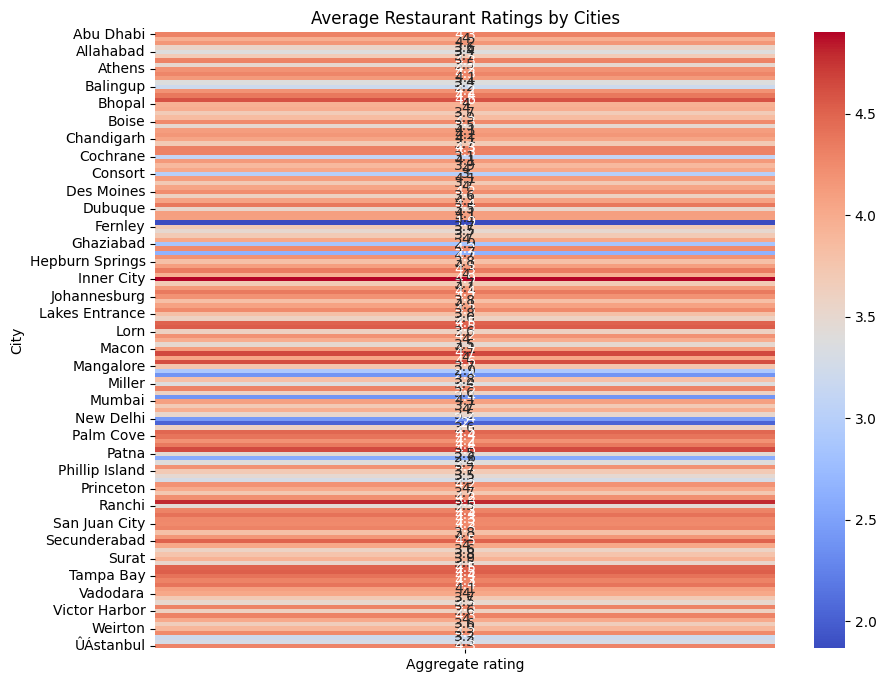

In [20]:
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()
city_ratings_pivot = city_ratings.pivot_table(index = 'City',values = 'Aggregate rating')
plt.figure(figsize=(10, 8))
sns.heatmap(city_ratings_pivot, annot=True, cmap='coolwarm')
plt.title('Average Restaurant Ratings by Cities')
plt.show()

Cuisine Distribution

In [21]:
cuisine_data = df.explode('Cuisines')
cuisine_distribution = cuisine_data.groupby(['City','Cuisines']).size().reset_index(name='Count')
cuisine_pivot = cuisine_distribution.pivot_table(index='City',columns='Cuisines',values='Count',fill_value=0)
cuisine_pivot

Cuisines,Afghani,"Afghani, Mughlai, Chinese","Afghani, North Indian","Afghani, North Indian, Pakistani, Arabian",African,"African, Portuguese",American,"American, Asian, Burger","American, Asian, European, Seafood","American, Asian, Italian, Seafood",...,"Turkish, Arabian, Middle Eastern","Turkish, Arabian, Moroccan, Lebanese","Turkish, Mediterranean, Middle Eastern",Vietnamese,"Vietnamese, Fish and Chips","Western, Asian, Cafe","Western, Fusion, Fast Food",World Cuisine,"World Cuisine, Mexican, Italian","World Cuisine, Patisserie, Cafe"
City,,,,,,,,,,,,,,,,,,,,,
Abu Dhabi,0,0,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Agra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ahmedabad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albany,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allahabad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weirton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wellington City,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Winchester Bay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Temporal Analysis - Can't be done as the dataset doesn't contains time stamps.

We had to generate synthetic date and time columns (zomato api was not available)

In [22]:
import numpy as np
df['Time'] = np.random.randint(0, 24, size=len(df))
df['Date'] = pd.date_range(start='1/1/2022', periods=len(df))
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Time,Date
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,13,2022-01-01
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,22,2022-01-02
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,6,2022-01-03
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,3,2022-01-04
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,6,2022-01-05


In [23]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Price range,Aggregate rating,Rating color,Rating text,Votes,Time,Date,Year,Month,Day
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,3,4.8,Dark Green,Excellent,314,13,2022-01-01,2022,1,1
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,3,4.5,Dark Green,Excellent,591,22,2022-01-02,2022,1,2
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4,4.4,Green,Very Good,270,6,2022-01-03,2022,1,3
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,4,4.9,Dark Green,Excellent,365,3,2022-01-04,2022,1,4
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,4,4.8,Dark Green,Excellent,229,6,2022-01-05,2022,1,5
